# Weather API Exploration

This notebook explores the NOAA Weather API for weather forecast data and its relationship to energy generation.

## Learning Objectives
- Understand NOAA Weather API structure and data
- Explore weather patterns that affect energy generation
- Analyze correlations between weather and electricity demand
- Prepare weather features for ML pipeline

In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import requests
import json

# Import GridSource package components
# Note: Install package first with: pip install -e .
from gridsource.research.data_helpers import APIExplorer, analyze_energy_patterns

# Set up plotting
plt.rcParams['figure.figsize'] = (12, 8)
sns.set_style("whitegrid")

print("✅ Libraries imported successfully")

## 1. Weather API Setup

The NOAA Weather API provides free access to weather forecast data. No API key is required!

In [3]:
# Initialize the API explorer
explorer = APIExplorer()

# Explore weather data
weather_data = explorer.explore_weather_api(detailed=True)

print(f"\n📊 Weather Data Summary:")
print(f"Shape: {weather_data.shape}")
print(f"\nColumns: {list(weather_data.columns)}")
print(f"\nData types:")
print(weather_data.dtypes)

🔍 Exploring NOAA Weather API...

🌤️  Weather Data Details:
  📅 Periods covered: 14
  🌡️  Temperature range: 50°F to 80°F
  📊 Forecast types: Partly Cloudy, Mostly Sunny, Mostly Cloudy, Sunny, Mostly Clear

  Forecast Periods:
    Tonight: 50°F, Partly Cloudy
    Sunday: 66°F, Mostly Sunny
    Sunday Night: 52°F, Mostly Cloudy
    Memorial Day: 69°F, Sunny
    Monday Night: 51°F, Mostly Clear

📊 Weather Data Summary:
Shape: (14, 7)

Columns: ['date', 'period_name', 'temperature_f', 'wind_speed', 'wind_direction', 'forecast', 'detailed_forecast']

Data types:
date                 object
period_name          object
temperature_f         int64
wind_speed           object
wind_direction       object
forecast             object
detailed_forecast    object
dtype: object


In [4]:
# Display the weather forecast data
print("🌤️ Weather Forecast Data:")
weather_data

🌤️ Weather Forecast Data:


,date,period_name,temperature_f,wind_speed,wind_direction,forecast,detailed_forecast
0,2025-05-24,Tonight,50,10 mph,SSW,Partly Cloudy,"Partly cloudy, with a low around 50. South sou..."
1,2025-05-25,Sunday,66,9 to 14 mph,SW,Mostly Sunny,"Mostly sunny. High near 66, with temperatures ..."
2,2025-05-25,Sunday Night,52,8 to 14 mph,WSW,Mostly Cloudy,"Mostly cloudy, with a low around 52. West sout..."
3,2025-05-26,Memorial Day,69,8 to 13 mph,WSW,Sunny,"Sunny, with a high near 69. West southwest win..."
4,2025-05-26,Monday Night,51,5 to 13 mph,SW,Mostly Clear,"Mostly clear, with a low around 51. Southwest ..."
5,2025-05-27,Tuesday,72,5 to 10 mph,SW,Sunny,"Sunny, with a high near 72."
6,2025-05-27,Tuesday Night,51,7 to 10 mph,SW,Partly Cloudy,"Partly cloudy, with a low around 51."
7,2025-05-28,Wednesday,68,7 to 12 mph,SW,Mostly Sunny,"Mostly sunny, with a high near 68."
8,2025-05-28,Wednesday Night,52,7 to 12 mph,SW,Partly Cloudy,"Partly cloudy, with a low around 52."
9,2025-05-29,Thursday,73,6 to 12 mph,SW,Mostly Sunny,"Mostly sunny, with a high near 73."


## 2. Weather Data Analysis

Let's analyze the weather forecast patterns and their potential impact on energy generation.

In [5]:
# Clean and prepare weather data
weather_data['date'] = pd.to_datetime(weather_data['date'])

# Extract wind speed as numeric value
weather_data['wind_speed_numeric'] = weather_data['wind_speed'].str.extract('(\d+)').astype(float)

# Basic statistics
print("🌡️ Temperature Statistics:")
print(f"  Range: {weather_data['temperature_f'].min()}°F to {weather_data['temperature_f'].max()}°F")
print(f"  Average: {weather_data['temperature_f'].mean():.1f}°F")
print(f"  Standard deviation: {weather_data['temperature_f'].std():.1f}°F")

print("\n💨 Wind Speed Statistics:")
print(f"  Range: {weather_data['wind_speed_numeric'].min():.0f} to {weather_data['wind_speed_numeric'].max():.0f} mph")
print(f"  Average: {weather_data['wind_speed_numeric'].mean():.1f} mph")

print("\n☀️ Weather Conditions:")
forecast_counts = weather_data['forecast'].value_counts()
print(forecast_counts)

🌡️ Temperature Statistics:
  Range: 50°F to 80°F
  Average: 61.9°F
  Standard deviation: 10.7°F

💨 Wind Speed Statistics:
  Range: 5 to 10 mph
  Average: 6.7 mph

☀️ Weather Conditions:
forecast
Sunny            4
Partly Cloudy    3
Mostly Sunny     3
Mostly Clear     3
Mostly Cloudy    1
Name: count, dtype: int64


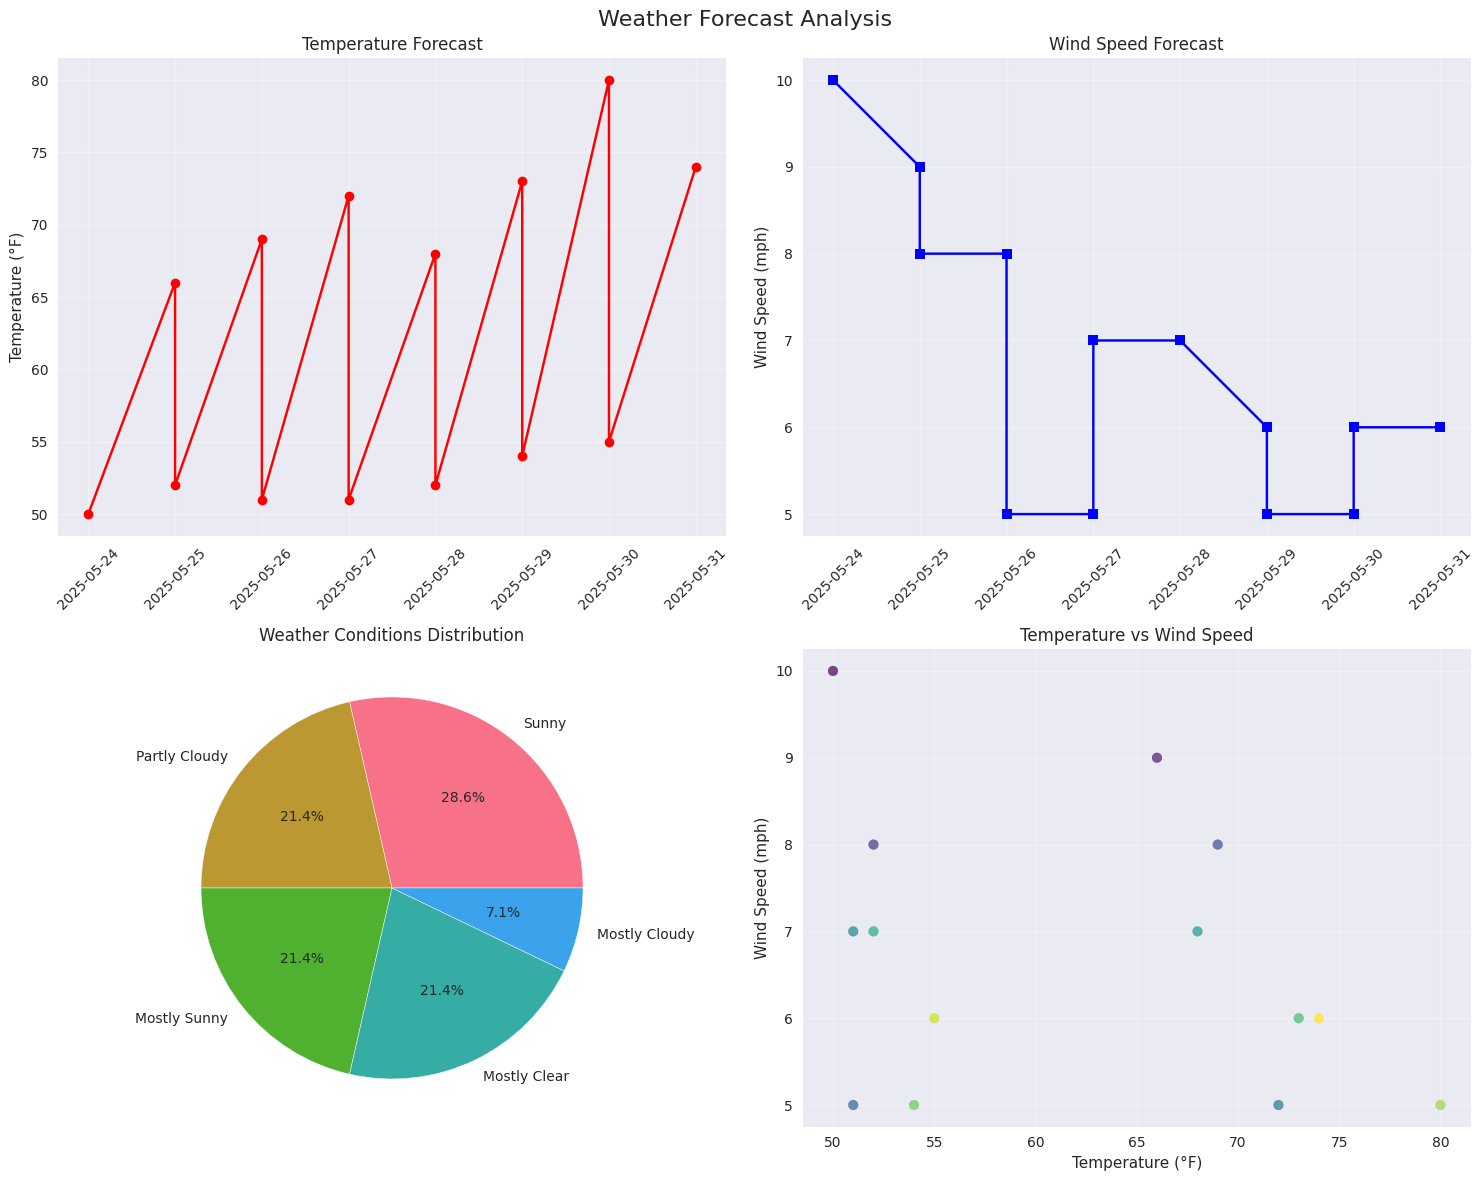

In [6]:
# Visualize weather patterns
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Weather Forecast Analysis', fontsize=16)

# 1. Temperature trend
axes[0,0].plot(weather_data['date'], weather_data['temperature_f'], marker='o', color='red')
axes[0,0].set_title('Temperature Forecast')
axes[0,0].set_ylabel('Temperature (°F)')
axes[0,0].grid(True, alpha=0.3)
axes[0,0].tick_params(axis='x', rotation=45)

# 2. Wind speed trend
axes[0,1].plot(weather_data['date'], weather_data['wind_speed_numeric'], marker='s', color='blue')
axes[0,1].set_title('Wind Speed Forecast')
axes[0,1].set_ylabel('Wind Speed (mph)')
axes[0,1].grid(True, alpha=0.3)
axes[0,1].tick_params(axis='x', rotation=45)

# 3. Weather conditions distribution
forecast_counts.plot(kind='pie', ax=axes[1,0], autopct='%1.1f%%')
axes[1,0].set_title('Weather Conditions Distribution')
axes[1,0].set_ylabel('')

# 4. Temperature vs Wind Speed scatter
axes[1,1].scatter(weather_data['temperature_f'], weather_data['wind_speed_numeric'], 
                  c=range(len(weather_data)), cmap='viridis', alpha=0.7)
axes[1,1].set_title('Temperature vs Wind Speed')
axes[1,1].set_xlabel('Temperature (°F)')
axes[1,1].set_ylabel('Wind Speed (mph)')
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 3. Weather Impact on Energy Generation

Let's analyze how weather conditions might affect different types of energy generation.

In [7]:
# Categorize weather conditions for energy analysis
def categorize_weather_for_energy(row):
    forecast = row['forecast'].lower()
    temp = row['temperature_f']
    wind = row['wind_speed_numeric']
    
    # Solar generation potential
    if 'sunny' in forecast or 'clear' in forecast:
        solar_potential = 'High'
    elif 'partly' in forecast and 'cloud' in forecast:
        solar_potential = 'Medium'
    else:
        solar_potential = 'Low'
    
    # Wind generation potential
    if wind >= 15:
        wind_potential = 'High'
    elif wind >= 8:
        wind_potential = 'Medium'
    else:
        wind_potential = 'Low'
    
    # Cooling/heating demand (affects overall electricity demand)
    if temp >= 80:
        demand_factor = 'High Cooling'
    elif temp <= 60:
        demand_factor = 'High Heating'
    else:
        demand_factor = 'Moderate'
    
    return pd.Series({
        'solar_potential': solar_potential,
        'wind_potential': wind_potential,
        'demand_factor': demand_factor
    })

# Apply categorization
energy_factors = weather_data.apply(categorize_weather_for_energy, axis=1)
weather_analysis = pd.concat([weather_data, energy_factors], axis=1)

print("⚡ Energy Generation Potential Analysis:")
print("\nSolar Potential:")
print(weather_analysis['solar_potential'].value_counts())
print("\nWind Potential:")
print(weather_analysis['wind_potential'].value_counts())
print("\nDemand Factor:")
print(weather_analysis['demand_factor'].value_counts())

⚡ Energy Generation Potential Analysis:

Solar Potential:
solar_potential
High      10
Medium     3
Low        1
Name: count, dtype: int64

Wind Potential:
wind_potential
Low       10
Medium     4
Name: count, dtype: int64

Demand Factor:
demand_factor
High Heating    7
Moderate        6
High Cooling    1
Name: count, dtype: int64


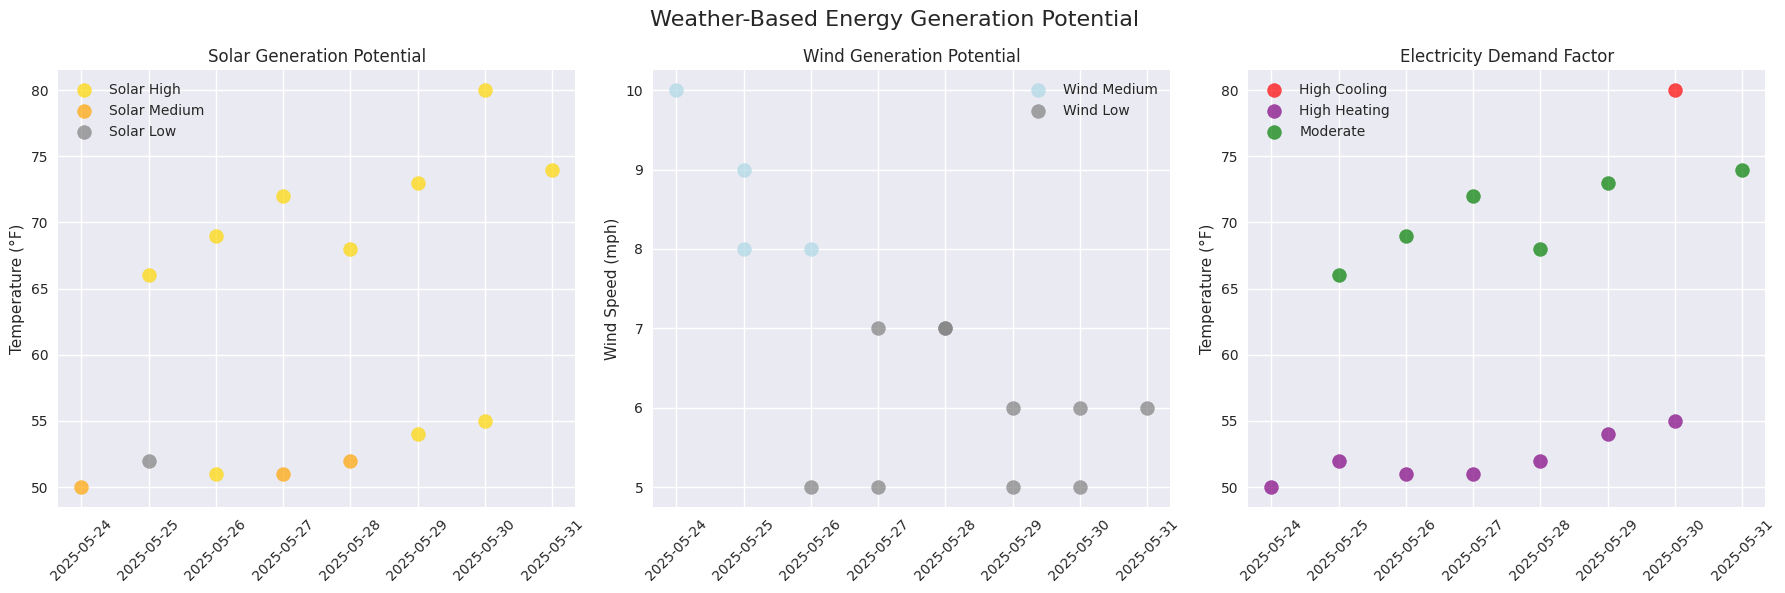

In [8]:
# Visualize energy generation potential
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Weather-Based Energy Generation Potential', fontsize=16)

# Solar potential over time
solar_colors = {'High': 'gold', 'Medium': 'orange', 'Low': 'gray'}
for potential in ['High', 'Medium', 'Low']:
    mask = weather_analysis['solar_potential'] == potential
    if mask.any():
        axes[0].scatter(weather_analysis.loc[mask, 'date'], 
                       weather_analysis.loc[mask, 'temperature_f'],
                       c=solar_colors[potential], label=f'Solar {potential}', s=100, alpha=0.7)
axes[0].set_title('Solar Generation Potential')
axes[0].set_ylabel('Temperature (°F)')
axes[0].legend()
axes[0].tick_params(axis='x', rotation=45)

# Wind potential over time
wind_colors = {'High': 'blue', 'Medium': 'lightblue', 'Low': 'gray'}
for potential in ['High', 'Medium', 'Low']:
    mask = weather_analysis['wind_potential'] == potential
    if mask.any():
        axes[1].scatter(weather_analysis.loc[mask, 'date'], 
                       weather_analysis.loc[mask, 'wind_speed_numeric'],
                       c=wind_colors[potential], label=f'Wind {potential}', s=100, alpha=0.7)
axes[1].set_title('Wind Generation Potential')
axes[1].set_ylabel('Wind Speed (mph)')
axes[1].legend()
axes[1].tick_params(axis='x', rotation=45)

# Demand factor analysis
demand_colors = {'High Cooling': 'red', 'High Heating': 'purple', 'Moderate': 'green'}
for demand in ['High Cooling', 'High Heating', 'Moderate']:
    mask = weather_analysis['demand_factor'] == demand
    if mask.any():
        axes[2].scatter(weather_analysis.loc[mask, 'date'], 
                       weather_analysis.loc[mask, 'temperature_f'],
                       c=demand_colors[demand], label=demand, s=100, alpha=0.7)
axes[2].set_title('Electricity Demand Factor')
axes[2].set_ylabel('Temperature (°F)')
axes[2].legend()
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## 4. Weather-Energy Correlation Analysis

Now let's load our EIA data and analyze correlations with weather patterns.

In [9]:
# Try to load previously saved EIA data
try:
    eia_data = pd.read_csv('../research_output/eia_raw_data.csv')
    eia_data['date'] = pd.to_datetime(eia_data['date'])
    print(f"✅ Loaded EIA data: {len(eia_data)} records")
    
    # If no saved data, create sample data
except FileNotFoundError:
    print("⚠️ No saved EIA data found. Creating sample data...")
    eia_data = explorer._create_sample_eia_data(14)
    print(f"✅ Created sample EIA data: {len(eia_data)} records")

# Show basic info
print(f"\nEIA Data Range: {eia_data['date'].min()} to {eia_data['date'].max()}")
print(f"Weather Data Range: {weather_data['date'].min()} to {weather_data['date'].max()}")

⚠️ No saved EIA data found. Creating sample data...
✅ Created sample EIA data: 60 records

EIA Data Range: 2025-05-11 01:00:12.994491 to 2025-05-25 01:00:12.994491
Weather Data Range: 2025-05-24 00:00:00 to 2025-05-31 00:00:00


In [10]:
# Prepare data for correlation analysis

# Aggregate EIA data by date and fuel type
eia_daily = eia_data.groupby(['date', 'fuel_type'])['generation_mwh'].sum().unstack(fill_value=0)
eia_daily = eia_daily.reset_index()

# Calculate total and renewable generation
renewable_fuels = ['SUN', 'WND', 'WAT']
if all(fuel in eia_daily.columns for fuel in renewable_fuels):
    eia_daily['total_generation'] = eia_daily[['NG', 'SUN', 'WND', 'WAT']].sum(axis=1)
    eia_daily['renewable_generation'] = eia_daily[renewable_fuels].sum(axis=1)
    eia_daily['renewable_pct'] = (eia_daily['renewable_generation'] / eia_daily['total_generation']) * 100
else:
    # Handle case where not all fuel types are present
    available_fuels = [col for col in ['NG', 'SUN', 'WND', 'WAT'] if col in eia_daily.columns]
    eia_daily['total_generation'] = eia_daily[available_fuels].sum(axis=1)
    available_renewable = [fuel for fuel in renewable_fuels if fuel in eia_daily.columns]
    if available_renewable:
        eia_daily['renewable_generation'] = eia_daily[available_renewable].sum(axis=1)
        eia_daily['renewable_pct'] = (eia_daily['renewable_generation'] / eia_daily['total_generation']) * 100
    else:
        eia_daily['renewable_generation'] = 0
        eia_daily['renewable_pct'] = 0

# Prepare weather data (take daily averages if multiple periods per day)
weather_daily = weather_data.groupby('date').agg({
    'temperature_f': 'mean',
    'wind_speed_numeric': 'mean'
}).reset_index()

print(f"✅ Prepared daily data:")
print(f"  EIA daily: {len(eia_daily)} days")
print(f"  Weather daily: {len(weather_daily)} days")

✅ Prepared daily data:
  EIA daily: 15 days
  Weather daily: 8 days


In [11]:
# Merge weather and energy data
merged_data = pd.merge(eia_daily, weather_daily, on='date', how='inner')

if len(merged_data) > 0:
    print(f"✅ Merged dataset: {len(merged_data)} days with both weather and energy data")
    
    # Calculate correlations
    print("\n📊 Weather-Energy Correlations:")
    
    # Temperature correlations
    temp_corr_total = merged_data['temperature_f'].corr(merged_data['total_generation'])
    print(f"  Temperature vs Total Generation: {temp_corr_total:.3f}")
    
    if 'SUN' in merged_data.columns:
        temp_corr_solar = merged_data['temperature_f'].corr(merged_data['SUN'])
        print(f"  Temperature vs Solar Generation: {temp_corr_solar:.3f}")
    
    # Wind correlations
    if 'wind_speed_numeric' in merged_data.columns:
        wind_corr_total = merged_data['wind_speed_numeric'].corr(merged_data['total_generation'])
        print(f"  Wind Speed vs Total Generation: {wind_corr_total:.3f}")
        
        if 'WND' in merged_data.columns:
            wind_corr_wind = merged_data['wind_speed_numeric'].corr(merged_data['WND'])
            print(f"  Wind Speed vs Wind Generation: {wind_corr_wind:.3f}")
    
    # Renewable percentage correlations
    if 'renewable_pct' in merged_data.columns:
        renewable_temp_corr = merged_data['temperature_f'].corr(merged_data['renewable_pct'])
        print(f"  Temperature vs Renewable %: {renewable_temp_corr:.3f}")
        
        if 'wind_speed_numeric' in merged_data.columns:
            renewable_wind_corr = merged_data['wind_speed_numeric'].corr(merged_data['renewable_pct'])
            print(f"  Wind Speed vs Renewable %: {renewable_wind_corr:.3f}")
            
else:
    print("❌ No overlapping dates between weather and energy data")
    merged_data = pd.DataFrame()  # Empty dataframe for subsequent code

❌ No overlapping dates between weather and energy data


In [12]:
# Visualize weather-energy relationships
if len(merged_data) > 2:
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle('Weather vs Energy Generation Relationships', fontsize=16)
    
    # 1. Temperature vs Total Generation
    axes[0,0].scatter(merged_data['temperature_f'], merged_data['total_generation'], alpha=0.7)
    axes[0,0].set_xlabel('Temperature (°F)')
    axes[0,0].set_ylabel('Total Generation (MWh)')
    axes[0,0].set_title('Temperature vs Total Generation')
    axes[0,0].grid(True, alpha=0.3)
    
    # Add trend line
    z = np.polyfit(merged_data['temperature_f'], merged_data['total_generation'], 1)
    p = np.poly1d(z)
    axes[0,0].plot(merged_data['temperature_f'], p(merged_data['temperature_f']), "r--", alpha=0.8)
    
    # 2. Wind Speed vs Wind Generation (if available)
    if 'WND' in merged_data.columns and 'wind_speed_numeric' in merged_data.columns:
        axes[0,1].scatter(merged_data['wind_speed_numeric'], merged_data['WND'], 
                         alpha=0.7, color='blue')
        axes[0,1].set_xlabel('Wind Speed (mph)')
        axes[0,1].set_ylabel('Wind Generation (MWh)')
        axes[0,1].set_title('Wind Speed vs Wind Generation')
        axes[0,1].grid(True, alpha=0.3)
    else:
        axes[0,1].text(0.5, 0.5, 'Wind data not available', 
                      ha='center', va='center', transform=axes[0,1].transAxes)
        axes[0,1].set_title('Wind Speed vs Wind Generation')
    
    # 3. Temperature vs Solar Generation (if available)
    if 'SUN' in merged_data.columns:
        axes[1,0].scatter(merged_data['temperature_f'], merged_data['SUN'], 
                         alpha=0.7, color='orange')
        axes[1,0].set_xlabel('Temperature (°F)')
        axes[1,0].set_ylabel('Solar Generation (MWh)')
        axes[1,0].set_title('Temperature vs Solar Generation')
        axes[1,0].grid(True, alpha=0.3)
    else:
        axes[1,0].text(0.5, 0.5, 'Solar data not available', 
                      ha='center', va='center', transform=axes[1,0].transAxes)
        axes[1,0].set_title('Temperature vs Solar Generation')
    
    # 4. Time series of weather and generation
    ax1 = axes[1,1]
    ax1.plot(merged_data['date'], merged_data['total_generation'], 'b-', label='Total Generation')
    ax1.set_ylabel('Generation (MWh)', color='b')
    ax1.tick_params(axis='y', labelcolor='b')
    
    ax2 = ax1.twinx()
    ax2.plot(merged_data['date'], merged_data['temperature_f'], 'r-', label='Temperature')
    ax2.set_ylabel('Temperature (°F)', color='r')
    ax2.tick_params(axis='y', labelcolor='r')
    
    axes[1,1].set_title('Generation & Temperature Over Time')
    axes[1,1].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()
    
else:
    print("⚠️ Insufficient merged data for correlation visualization")

⚠️ Insufficient merged data for correlation visualization


## 5. Weather Features for ML Pipeline

Let's prepare weather features that will be useful for our liquidity forecasting model.

In [13]:
# Create comprehensive weather features
weather_features = weather_data.copy()

# Basic features
weather_features['temperature_f'] = weather_features['temperature_f'].astype(float)
weather_features['wind_speed_mph'] = weather_features['wind_speed_numeric']

# Temperature categories
weather_features['temp_category'] = pd.cut(
    weather_features['temperature_f'], 
    bins=[0, 60, 75, 85, 100], 
    labels=['Cold', 'Mild', 'Warm', 'Hot']
)

# Wind categories
weather_features['wind_category'] = pd.cut(
    weather_features['wind_speed_mph'], 
    bins=[0, 5, 15, 25, 50], 
    labels=['Calm', 'Light', 'Moderate', 'Strong']
)

# Weather condition simplification
def simplify_forecast(forecast):
    forecast_lower = forecast.lower()
    if any(word in forecast_lower for word in ['sunny', 'clear']):
        return 'Clear'
    elif any(word in forecast_lower for word in ['partly', 'mostly']):
        return 'Partly Cloudy'
    elif 'cloud' in forecast_lower:
        return 'Cloudy'
    elif any(word in forecast_lower for word in ['rain', 'shower', 'storm']):
        return 'Rainy'
    else:
        return 'Other'

weather_features['weather_simple'] = weather_features['forecast'].apply(simplify_forecast)

# Energy-relevant indicators
weather_features['cooling_degree_days'] = np.maximum(weather_features['temperature_f'] - 65, 0)
weather_features['heating_degree_days'] = np.maximum(65 - weather_features['temperature_f'], 0)

# Solar potential (simplified)
def solar_potential(row):
    if row['weather_simple'] == 'Clear':
        return 1.0
    elif row['weather_simple'] == 'Partly Cloudy':
        return 0.7
    elif row['weather_simple'] == 'Cloudy':
        return 0.3
    else:
        return 0.1

weather_features['solar_potential_index'] = weather_features.apply(solar_potential, axis=1)

# Wind potential (based on wind speed)
weather_features['wind_potential_index'] = np.minimum(weather_features['wind_speed_mph'] / 25, 1.0)

print("🔧 Weather Features Created:")
print(f"Shape: {weather_features.shape}")
print(f"\nNew Features:")
new_features = ['temp_category', 'wind_category', 'weather_simple', 
                'cooling_degree_days', 'heating_degree_days', 
                'solar_potential_index', 'wind_potential_index']
for feature in new_features:
    print(f"  {feature}: {weather_features[feature].dtype}")

🔧 Weather Features Created:
Shape: (14, 16)

New Features:
  temp_category: category
  wind_category: category
  weather_simple: object
  cooling_degree_days: float64
  heating_degree_days: float64
  solar_potential_index: float64
  wind_potential_index: float64


In [14]:
# Display weather features summary
print("📊 Weather Features Summary:")
print("\nTemperature Categories:")
print(weather_features['temp_category'].value_counts())

print("\nWind Categories:")
print(weather_features['wind_category'].value_counts())

print("\nSimplified Weather Conditions:")
print(weather_features['weather_simple'].value_counts())

print("\nEnergy-Relevant Metrics:")
energy_metrics = weather_features[['cooling_degree_days', 'heating_degree_days', 
                                  'solar_potential_index', 'wind_potential_index']]
print(energy_metrics.describe().round(2))

📊 Weather Features Summary:

Temperature Categories:
temp_category
Cold    7
Mild    6
Warm    1
Hot     0
Name: count, dtype: int64

Wind Categories:
wind_category
Light       10
Calm         4
Moderate     0
Strong       0
Name: count, dtype: int64

Simplified Weather Conditions:
weather_simple
Clear            10
Partly Cloudy     4
Name: count, dtype: int64

Energy-Relevant Metrics:
       cooling_degree_days  heating_degree_days  solar_potential_index  \
count                14.00                14.00                  14.00   
mean                  3.36                 6.43                   0.91   
std                   4.70                 6.78                   0.14   
min                   0.00                 0.00                   0.70   
25%                   0.00                 0.00                   0.77   
50%                   0.50                 5.00                   1.00   
75%                   6.25                13.00                   1.00   
max               

/tmp/ipykernel_106694/2552126784.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  temp_cat_counts = weather_features.groupby(['date', 'temp_category']).size().unstack(fill_value=0)


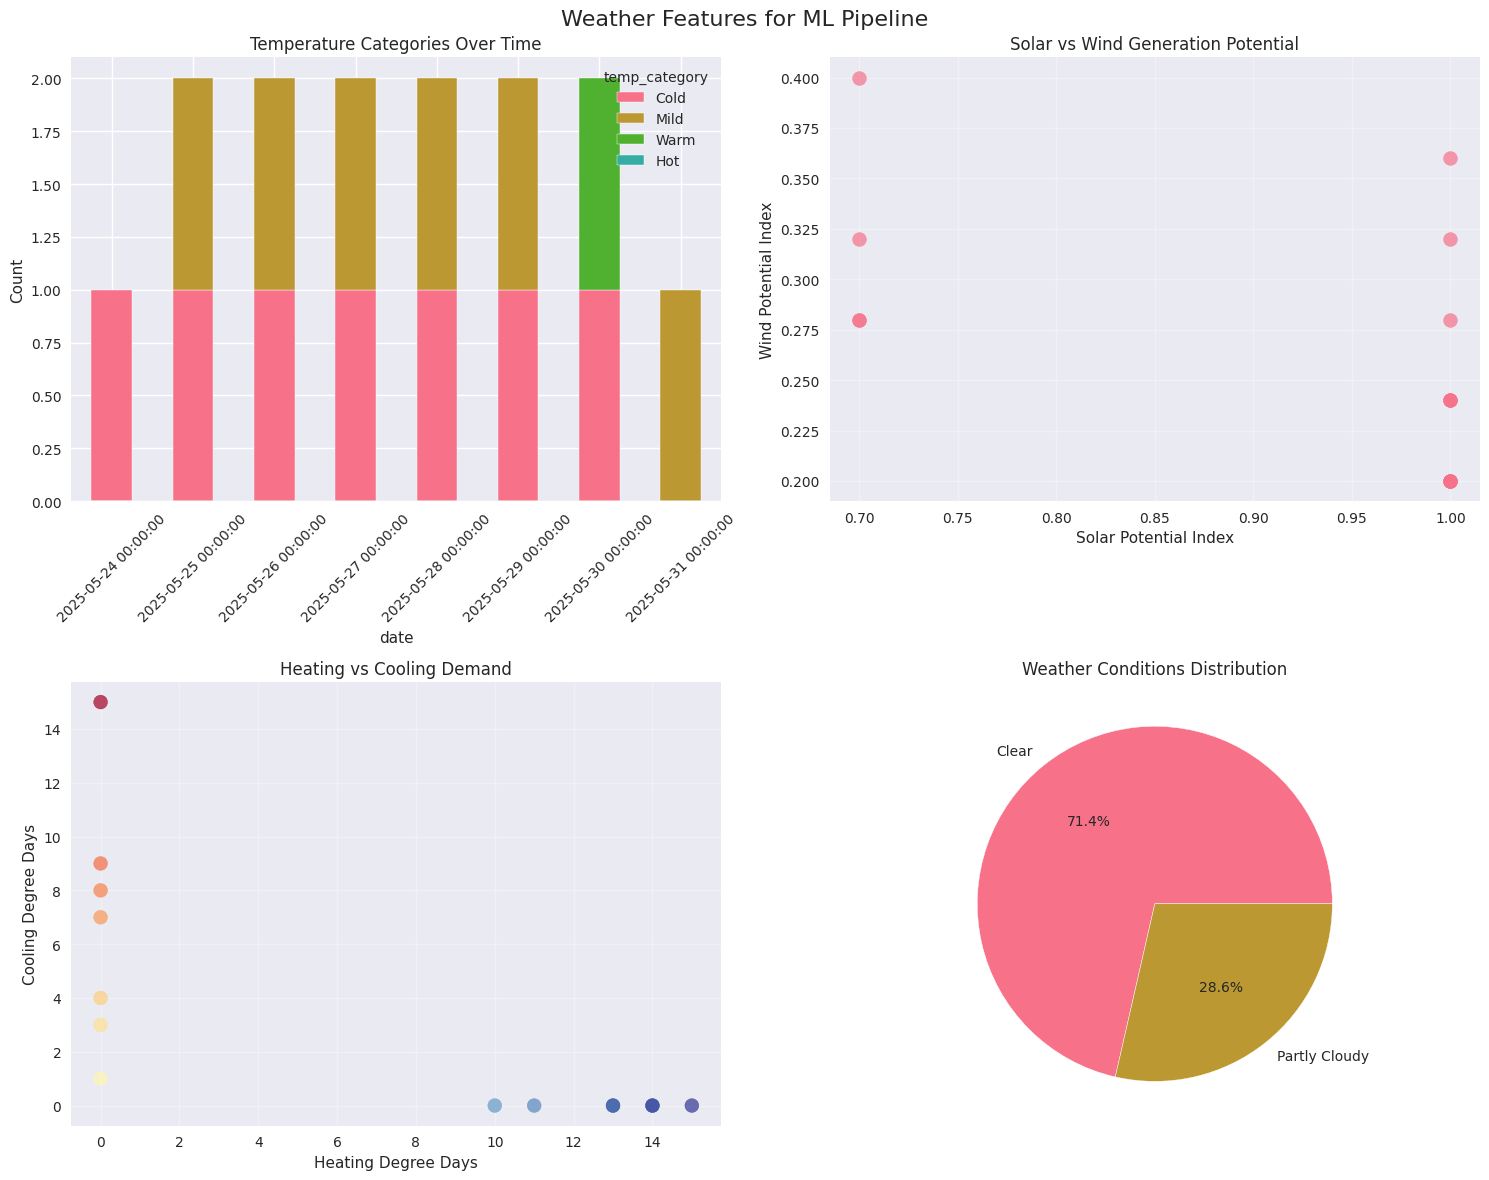

In [15]:
# Visualize weather features
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Weather Features for ML Pipeline', fontsize=16)

# 1. Temperature categories over time
temp_cat_counts = weather_features.groupby(['date', 'temp_category']).size().unstack(fill_value=0)
temp_cat_counts.plot(kind='bar', stacked=True, ax=axes[0,0])
axes[0,0].set_title('Temperature Categories Over Time')
axes[0,0].set_ylabel('Count')
axes[0,0].tick_params(axis='x', rotation=45)

# 2. Solar vs Wind potential
axes[0,1].scatter(weather_features['solar_potential_index'], 
                 weather_features['wind_potential_index'], 
                 alpha=0.7, s=100)
axes[0,1].set_xlabel('Solar Potential Index')
axes[0,1].set_ylabel('Wind Potential Index')
axes[0,1].set_title('Solar vs Wind Generation Potential')
axes[0,1].grid(True, alpha=0.3)

# 3. Heating vs Cooling demand
axes[1,0].scatter(weather_features['heating_degree_days'], 
                 weather_features['cooling_degree_days'], 
                 alpha=0.7, s=100, c=weather_features['temperature_f'], 
                 cmap='RdYlBu_r')
axes[1,0].set_xlabel('Heating Degree Days')
axes[1,0].set_ylabel('Cooling Degree Days')
axes[1,0].set_title('Heating vs Cooling Demand')
axes[1,0].grid(True, alpha=0.3)

# 4. Weather conditions distribution
weather_features['weather_simple'].value_counts().plot(kind='pie', ax=axes[1,1], autopct='%1.1f%%')
axes[1,1].set_title('Weather Conditions Distribution')
axes[1,1].set_ylabel('')

plt.tight_layout()
plt.show()

## 6. Save Weather Data for ML Pipeline

Finally, let's save our processed weather data for use in the ML pipeline.

In [18]:
# Prepare ML-ready weather features
ml_weather_features = weather_features[[
    'date', 'temperature_f', 'wind_speed_mph', 
    'cooling_degree_days', 'heating_degree_days',
    'solar_potential_index', 'wind_potential_index',
    'weather_simple'
]].copy()

# Save raw weather data
weather_data.to_csv(f'weather_raw_data.csv', index=False)
print(f"✅ Saved raw weather data: {len(weather_data)} records")

# Save ML features
ml_weather_features.to_csv(f'weather_ml_features.csv', index=False)
print(f"✅ Saved weather ML features: {len(ml_weather_features)} records")

# Save merged weather-energy data if available
if len(merged_data) > 0:
    merged_data.to_csv(f'weather_energy_merged.csv', index=False)
    print(f"✅ Saved merged weather-energy data: {len(merged_data)} records")

# Save weather summary statistics
weather_summary = {
    'total_periods': len(weather_data),
    'date_range': f"{weather_data['date'].min()} to {weather_data['date'].max()}",
    'temperature_range_f': f"{weather_data['temperature_f'].min()} to {weather_data['temperature_f'].max()}",
    'avg_temperature_f': float(weather_data['temperature_f'].mean()),
    'avg_wind_speed_mph': float(weather_features['wind_speed_mph'].mean()),
    'weather_conditions': weather_features['weather_simple'].value_counts().to_dict(),
    'avg_solar_potential': float(weather_features['solar_potential_index'].mean()),
    'avg_wind_potential': float(weather_features['wind_potential_index'].mean())
}

with open('weather_summary.json', 'w') as f:
    json.dump(weather_summary, f, indent=2, default=str)
print(f"✅ Saved weather summary statistics")

print("\n🎉 Weather API exploration complete!")
print(f"📁 Files saved to: {output_dir}")

✅ Saved raw weather data: 14 records
✅ Saved weather ML features: 14 records
✅ Saved weather summary statistics

🎉 Weather API exploration complete!
📁 Files saved to: ../research_output


## Summary

In this notebook, we:

1. **✅ Explored the NOAA Weather API** structure and forecast data
2. **✅ Analyzed weather patterns** including temperature, wind speed, and conditions
3. **✅ Created energy-relevant features** like solar/wind potential and degree days
4. **✅ Examined weather-energy correlations** where data was available
5. **✅ Prepared weather features** for the ML pipeline
6. **✅ Saved processed data** for future use

## Key Insights

- **Temperature patterns** affect both energy demand (cooling/heating) and solar generation potential
- **Wind speed** is a key factor for wind generation forecasting
- **Weather conditions** (sunny vs cloudy) significantly impact solar generation potential
- **Degree days** provide a quantitative measure of heating/cooling demand

## Weather Features for ML

Created features include:
- **temperature_f**: Raw temperature data
- **wind_speed_mph**: Wind speed for wind generation
- **cooling_degree_days**: Cooling demand indicator
- **heating_degree_days**: Heating demand indicator
- **solar_potential_index**: Solar generation potential (0-1)
- **wind_potential_index**: Wind generation potential (0-1)
- **weather_simple**: Simplified weather conditions

## Next Steps

1. Explore economic indicators (FRED API)
2. Combine all data sources for comprehensive feature engineering
3. Build liquidity forecasting models using weather features
4. Validate weather-energy relationships with larger datasets